In [9]:
# package to clean text
import nltk; nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

# packages to store and manipulate data
import numpy as np
import pandas as pd
from pprint import pprint

# spacy for lemmatization
import spacy
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\607791\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Import Dataset
df = pd.read_csv('C:/Users/607791/Desktop/DS/Practicum/billboard_lyrics_1964-2015.csv')
df.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,NaN,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [11]:
df.shape

(5100, 6)

In [12]:
df=df.drop(['Source'], axis=1)
df=df.dropna()
df.shape

(4866, 5)

In [13]:
df.head()

,Rank,Song,Artist,Year,Lyrics
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...


In [14]:
# clean text function
def clean_text(docs):
    # remove punctuation and numbers
    print('removing punctuation and digits')
    table = str.maketrans({key: None for key in string.punctuation + string.digits})
    clean_docs = [d.translate(table) for d in docs]
    
    print('spacy nlp...')
    nlp_docs = [nlp(d) for d in clean_docs]
    
    # pronouns stay, rest lemmatized
    print('getting lemmas')
    lemmatized_docs = [[w.lemma_ if w.lemma_ != '-PRON-'
                           else w.lower_
                           for w in d]
                      for d in nlp_docs]
    
    # remove stopwords
    print('removing stopwords')
    lemmatized_docs = [[lemma for lemma in doc if lemma not in stopwords] for doc in lemmatized_docs]
    
    # join tokens back into doc
    clean_docs = [' '.join(l) for l in lemmatized_docs]
        
    return clean_docs

In [15]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords = set(stopwords + ['use', 'make', 'see', 'how', 'go', 'say', 'ask', 'get'])

In [16]:
import string
# list

data = df.Lyrics.values.tolist()

data = clean_text(data)

removing punctuation and digits
spacy nlp...
getting lemmas
removing stopwords


In [17]:
import re
# remove http links
data = [re.sub('http://\S+', '', sent) for sent in data]

# remove https links
data = [re.sub('https://\S+', '', sent) for sent in data]

# remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# remove single quotes
data = [re.sub("\'", "", sent) for sent in data]

clean_lyric = data

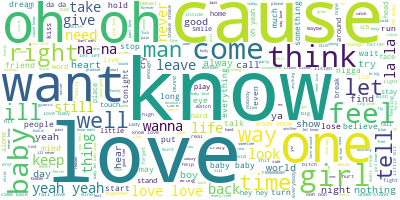

In [18]:
# wordcloud
from wordcloud import WordCloud
long_string = ','.join(list(data))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

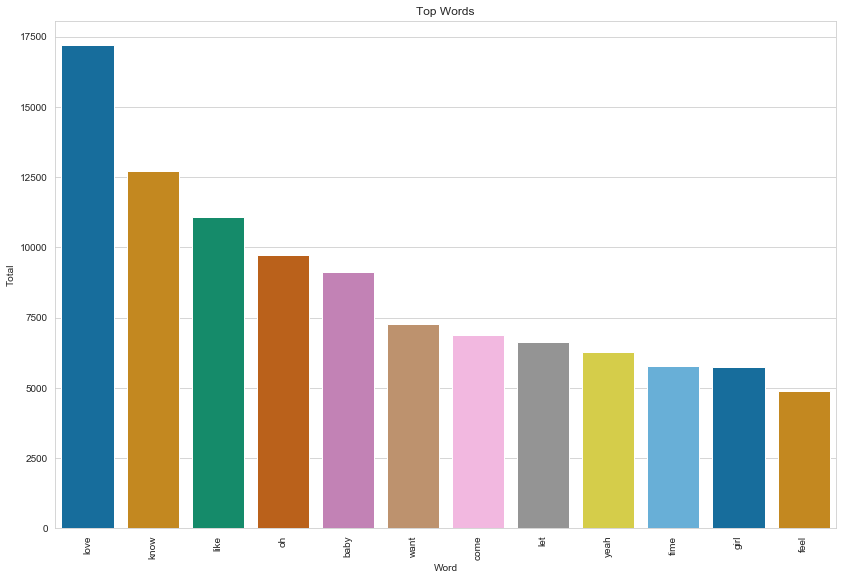

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# visualize the top occuring words post cleaning
def top_words(count, vectorize):
    import matplotlib.pyplot as plt
    word = vectorize.get_feature_names()
    total = np.zeros(len(word))
    for t in count:
        total+=t.toarray()[0]
    
    dict_count = (zip(word, total))
    dict_count = sorted(dict_count, key=lambda x:x[1], reverse=True)[0:12]
    word = [w[0] for w in dict_count]
    counts = [w[1] for w in dict_count]
    x_pos = np.arange(len(word)) 
    
    plt.figure(2, figsize=(14, 14/1.5))
    plt.subplot(title='Top Words')
    sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='colorblind')
    plt.xticks(x_pos, word, rotation=90) 
    plt.xlabel('Word')
    plt.ylabel('Total')
    plt.show()

vectorize = CountVectorizer(stop_words='english')
count = vectorize.fit_transform(data)
top_words(count, vectorize)

In [20]:
top_artist = df.Artist.value_counts()[:25]
top_artist

madonna                34
elton john             25
mariah carey           24
janet jackson          22
michael jackson        22
stevie wonder          20
whitney houston        19
taylor swift           19
rihanna                19
pink                   17
the beatles            17
kelly clarkson         17
the black eyed peas    16
britney spears         16
usher                  14
katy perry             14
chicago                14
boyz ii men            13
kool  the gang         13
phil collins           13
aretha franklin        13
r kelly                13
maroon 5               13
rod stewart            13
bee gees               12
Name: Artist, dtype: int64

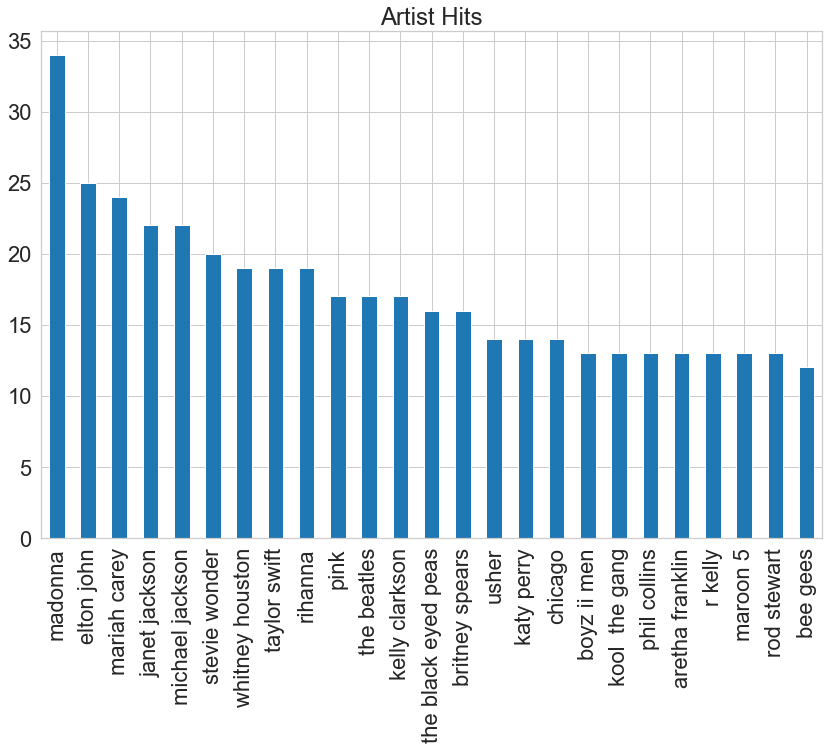

In [25]:
plt.figure(2, figsize=(14, 14/1.5))
plt.title("Artist Hits")
df['Artist'].value_counts()[:25].plot('bar')

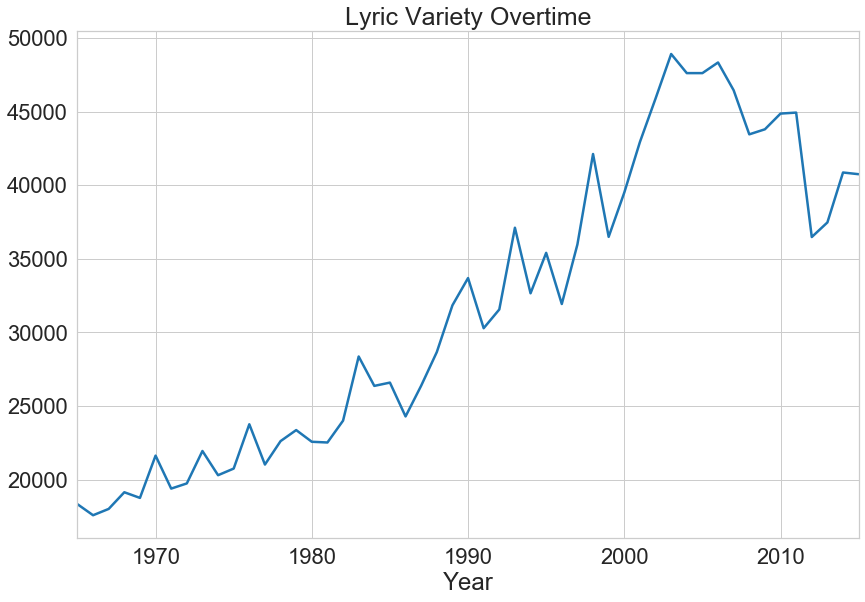

In [35]:
df['lyric_total'] = df['Lyrics'].str.split(" ").str.len()
decade_lyrics = df.groupby(['Year'])['lyric_total'].sum()
plt.figure(figsize=(14, 14/1.5))
plt.title("Lyric Variety Overtime",fontsize=25)
decade_lyrics.plot(kind='line')